# Zyfra Machine Learning Model

## Introduction

Prepare a prototype of a machine learning model for Zyfra. The company develops efficiency solutions for heavy industry.

The model should predict the amount of gold recovered from gold ore. You have the data on extraction and purification.

The model will help to optimize the production and eliminate unprofitable parameters.

## Prepare the Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [2]:
def read_data(path):
    df = pd.read_csv(path)
    print(df.info())
    print(df.describe())
    print(f'Null/Missing Values= {df.isna().sum()}')
    print(f'Duplicate Values= {df.duplicated().sum()}')
    return df

In [3]:
train = read_data('/datasets/gold_recovery_train.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                16860 non-null  object 
 1   final.output.concentrate_ag                         16788 non-null  float64
 2   final.output.concentrate_pb                         16788 non-null  float64
 3   final.output.concentrate_sol                        16490 non-null  float64
 4   final.output.concentrate_au                         16789 non-null  float64
 5   final.output.recovery                               15339 non-null  float64
 6   final.output.tail_ag                                16794 non-null  float64
 7   final.output.tail_pb                                16677 non-null  float64
 8   final.output.tail_sol                               16715 non-null  float64


Duplicate Values= 0


In [4]:
test = read_data('/datasets/gold_recovery_test.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5856 non-null   object 
 1   primary_cleaner.input.sulfate               5554 non-null   float64
 2   primary_cleaner.input.depressant            5572 non-null   float64
 3   primary_cleaner.input.feed_size             5856 non-null   float64
 4   primary_cleaner.input.xanthate              5690 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5840 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5840 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5840 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5840 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5840 non-null   float64
 10  primary_clea

In [5]:
full = read_data('/datasets/gold_recovery_full.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                22716 non-null  object 
 1   final.output.concentrate_ag                         22627 non-null  float64
 2   final.output.concentrate_pb                         22629 non-null  float64
 3   final.output.concentrate_sol                        22331 non-null  float64
 4   final.output.concentrate_au                         22630 non-null  float64
 5   final.output.recovery                               20753 non-null  float64
 6   final.output.tail_ag                                22633 non-null  float64
 7   final.output.tail_pb                                22516 non-null  float64
 8   final.output.tail_sol                               22445 non-null  float64


Duplicate Values= 0


In [6]:
#Checking recovery value in train data
train['rougher.output.recovery']

0        87.107763
1        86.843261
2        86.842308
3        87.226430
4        86.688794
           ...    
16855    89.574376
16856    87.724007
16857    88.890579
16858    89.858126
16859    89.514960
Name: rougher.output.recovery, Length: 16860, dtype: float64

In [7]:
#Calculate recovery value and MSE for calculated and data values
train_recovery = train.dropna(subset=['rougher.output.concentrate_au',\
                            'rougher.input.feed_au', 'rougher.output.tail_au', 'rougher.output.recovery'])

C = train_recovery['rougher.output.concentrate_au']
F = train_recovery['rougher.input.feed_au']
T = train_recovery['rougher.output.tail_au']

recovery = (C * (F - T) / (F * (C - T))) * 100

mae_recovery = mean_absolute_error(train_recovery['rougher.output.recovery'], recovery)

print(mae_recovery)

9.303415616264301e-15


In [8]:
train[list(train.columns.difference(test.columns))].dtypes

final.output.concentrate_ag                           float64
final.output.concentrate_au                           float64
final.output.concentrate_pb                           float64
final.output.concentrate_sol                          float64
final.output.recovery                                 float64
final.output.tail_ag                                  float64
final.output.tail_au                                  float64
final.output.tail_pb                                  float64
final.output.tail_sol                                 float64
primary_cleaner.output.concentrate_ag                 float64
primary_cleaner.output.concentrate_au                 float64
primary_cleaner.output.concentrate_pb                 float64
primary_cleaner.output.concentrate_sol                float64
primary_cleaner.output.tail_ag                        float64
primary_cleaner.output.tail_au                        float64
primary_cleaner.output.tail_pb                        float64
primary_

In [9]:
#Fill in missing values
train = train.ffill().bfill()
test = test.ffill().bfill()
full = full.ffill().bfill()

cols = ["date", "rougher.output.recovery", "final.output.recovery", "rougher.output.concentrate_au",\
        "rougher.output.concentrate_ag", "rougher.output.concentrate_pb", "rougher.output.concentrate_sol",\
        "final.output.concentrate_au", "final.output.concentrate_ag", "final.output.concentrate_pb",\
        "final.output.concentrate_sol"]

train_and_test = train.columns.intersection(test.columns)

test = test.merge(full[cols], on = 'date', how = 'left')

train = train.drop('date', axis = 1)
test = test.drop('date', axis = 1)

### Conclusion

- A lot of columns had missing values that we filled using forward and backwards fill.
- Manually calculated recovery value and found out that the MAE was 9.30
- Figured out which columns were not in the test set and initiated our train and test sets with that information

## Analyze the Data
Take note of how the concentrations of metals (Au, Ag, Pb) change depending on the purification stage.

Compare the feed particle size distributions in the training set and in the test set. If the distributions vary significantly, the model evaluation will be incorrect.

Consider the total concentrations of all substances at different stages: raw feed, rougher concentrate, and final concentrate. Do you notice any abnormal values in the total distribution? If you do, is it worth removing such values from both samples? Describe the findings and eliminate anomalies. 

In [10]:
au = ['rougher.input.feed_au', 'rougher.output.concentrate_au',\
       'primary_cleaner.output.concentrate_au', 'final.output.concentrate_au']
ag = ['rougher.input.feed_ag', 'rougher.output.concentrate_ag',\
       'primary_cleaner.output.concentrate_ag', 'final.output.concentrate_ag']
pb = ['rougher.input.feed_pb', 'rougher.output.concentrate_pb',\
       'primary_cleaner.output.concentrate_pb', 'final.output.concentrate_pb']

In [11]:
def make_graph(metal):
    plt.figure(figsize = (12, 6))
    for i in metal:
        plt.hist(full[i], bins = 50)
        
    plt.title(metal[0][len(metal[0]) - 2:])
    plt.legend(["rougher.input.feed", "rougher.output.concentrate", \
        "primary_cleaner.output.concentrate", "final.output.concentrate",])
    plt.xlabel('Concentration')
    plt.ylabel('Frequency')
    plt.show()

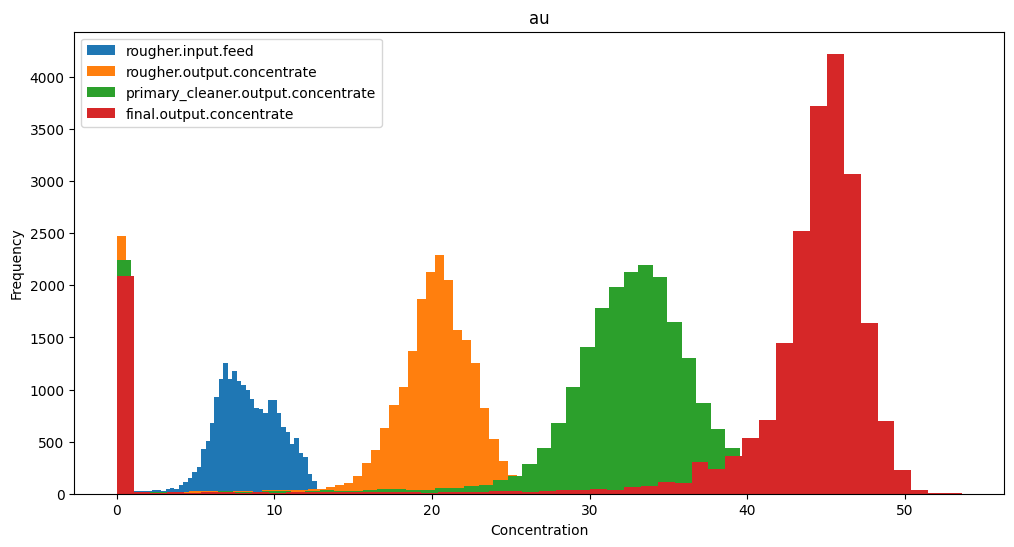

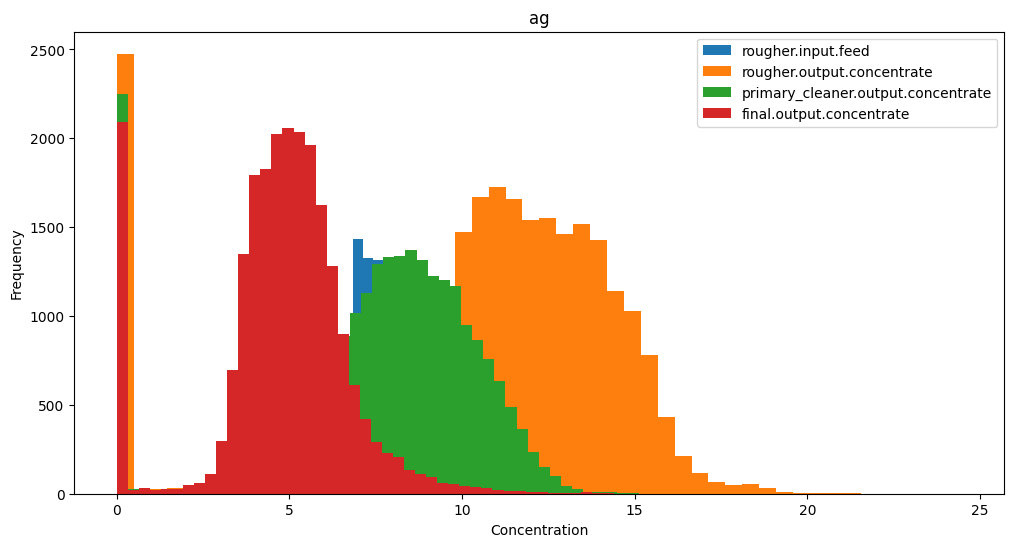

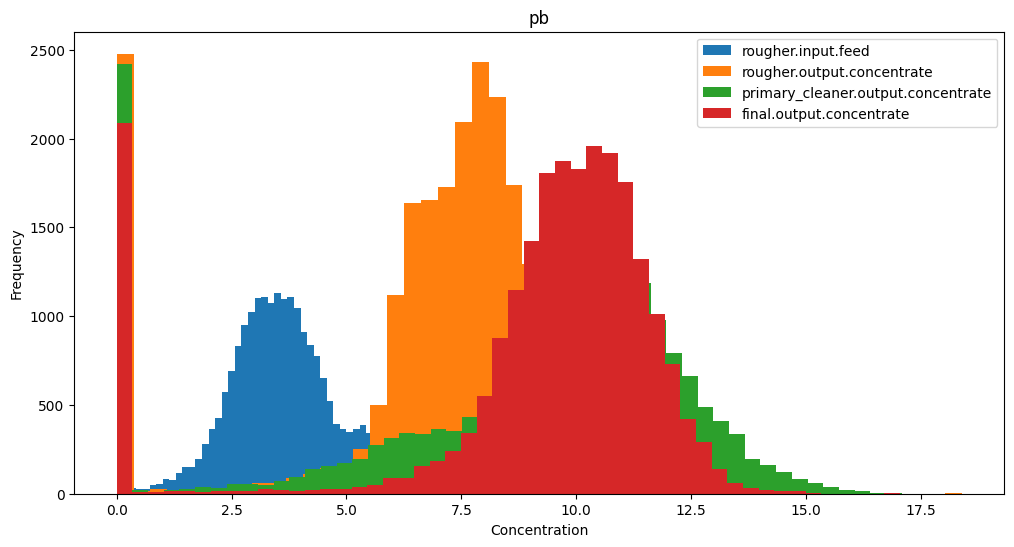

In [12]:
make_graph(au)
make_graph(ag)
make_graph(pb)

- Concentrations of au went up after each cycle.
- Concentrations of ag were initially up but afterward went down again in the last cycles.
- Concentrations of pb only went up a bit, but then didn't go up after the last cycle.

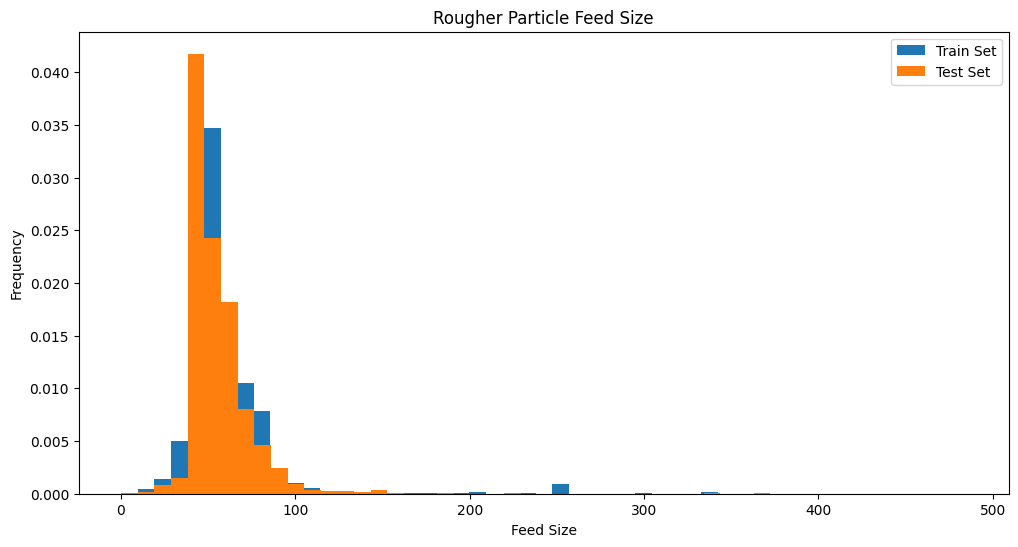

In [13]:
#Compare feed particle size in train and test set
plt.figure(figsize = (12, 6))
plt.hist(train['rougher.input.feed_size'], bins = 50, density = True)
plt.hist(test['rougher.input.feed_size'], bins = 50, density = True)

plt.xlabel('Feed Size')
plt.ylabel('Frequency')
plt.title('Rougher Particle Feed Size')
plt.legend(['Train Set', 'Test Set'])

plt.show()

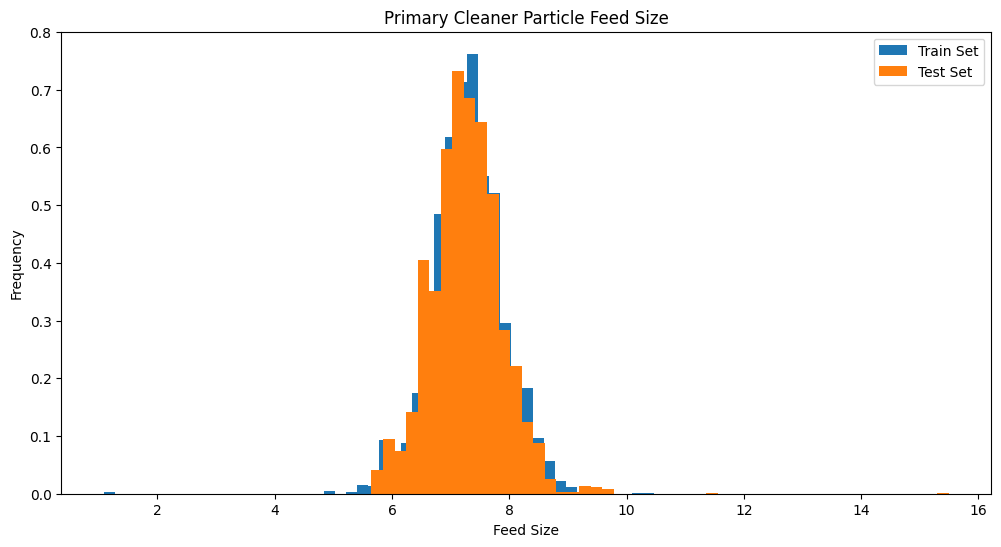

In [14]:
plt.figure(figsize = (12, 6))
plt.hist(train['primary_cleaner.input.feed_size'], bins = 50, density = True)
plt.hist(test['primary_cleaner.input.feed_size'], bins = 50, density = True)

plt.xlabel('Feed Size')
plt.ylabel('Frequency')
plt.title('Primary Cleaner Particle Feed Size')
plt.legend(['Train Set', 'Test Set'])

plt.show()

It looks like both distributions are very similar so our model evaluation will be fine.

In [15]:
def raw_all(df):
    return df["rougher.input.feed_au"] + df["rougher.input.feed_ag"]\
+ df["rougher.input.feed_pb"] + df["rougher.input.feed_sol"]

def rougher_all(df):
    return df["rougher.output.concentrate_au"] + df["rougher.output.concentrate_ag"]\
+ df["rougher.output.concentrate_pb"] + df["rougher.output.concentrate_sol"]

def final_all(df):
    return df["final.output.concentrate_au"] + df["final.output.concentrate_ag"]\
+ df["final.output.concentrate_pb"] + df["final.output.concentrate_sol"]

In [16]:
raw = raw_all(full)

rougher = rougher_all(full)

final = final_all(full)

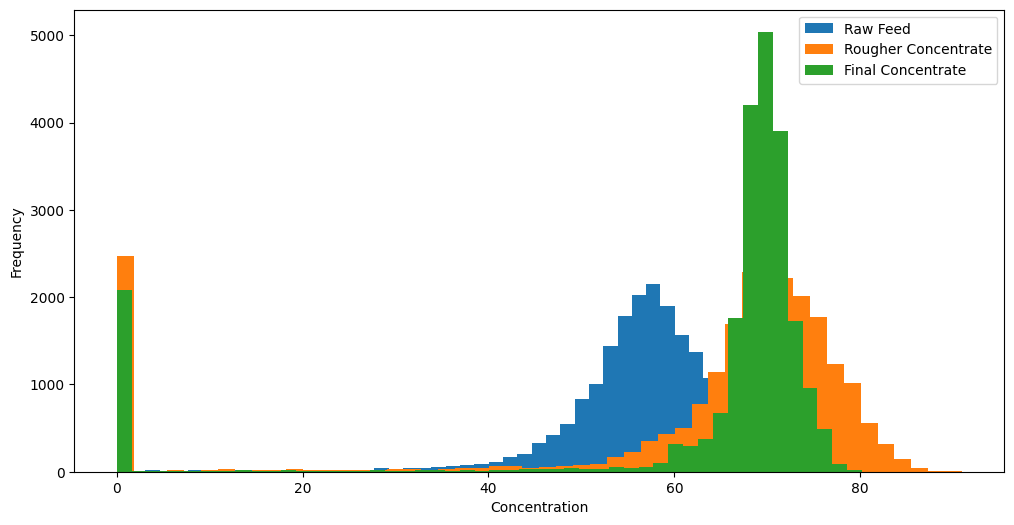

In [17]:
plt.figure(figsize = (12, 6))

plt.hist(raw, bins = 50)
plt.hist(rougher, bins = 50)
plt.hist(final, bins = 50)

plt.legend(['Raw Feed', 'Rougher Concentrate', 'Final Concentrate'])
plt.xlabel('Concentration')
plt.ylabel('Frequency')
plt.show()

It seems that there is a lot of values near 0 so we will have to remove these values from our data.

In [18]:
#Remove outliers from data
train['rougher.raw.all'] = raw_all(train)
train['rougher.concentrate.all'] = rougher_all(train)
train['final.concentrate.all'] = final_all(train)

train = train[train['rougher.raw.all'] > 25 | (train['rougher.concentrate.all'] > 25) \
| (train['final.concentrate.all'] > 25)]

train = train.drop(['rougher.raw.all', 'rougher.concentrate.all', 'final.concentrate.all'], axis = 1)

test['rougher.raw.all'] = raw_all(test)
test['rougher.concentrate.all'] = rougher_all(test)
test['final.concentrate.all'] = final_all(test)

test = test[test['rougher.raw.all'] > 25 | (test['rougher.concentrate.all'] > 25) \
| (test['final.concentrate.all'] > 25)]

test = test.drop(['rougher.raw.all', 'rougher.concentrate.all', 'final.concentrate.all'], axis = 1)

### Conclusion

The different metals had varying results of concentrations after each of the cycles.
- Concentrations of au went up after each cycle.
- Concentrations of ag were initially up but afterward went down again in the last cycles.
- Concentrations of pb only went up a bit, but then didn't go up after the last cycle.

The distributions of the particle feed sizes were very similar so there is no issue for the model evaluation to be faulty.

We noticed that there were outliers in the data at near 0. They should be removed as it would improve the model training. 

## Build the model

Write a function to calculate the final sMAPE value.

Train different models. Evaluate them using cross-validation. Pick the best model and test it using the test sample. Provide findings.

In [19]:
def calc_smape(target, prediction):
    return 100 / len(target) * np.sum(2 * np.abs(target - prediction) / (np.abs(target) + np.abs(prediction)))
    
def final_smape(target, prediction):
    prediction_rough, prediction_final = prediction[:, 1], prediction[:, 0]
    target_rough, target_final = target.iloc[:, 1], target.iloc[:, 0]
    ans = (.25 * (calc_smape(target_rough, prediction_rough))) + (.75 * (calc_smape(target_final, prediction_final)))
    return ans

smape_scorer = make_scorer(final_smape)

In [20]:
train_and_test = train_and_test.drop('date')

features_train = train[train_and_test]
target_train = train[['rougher.output.recovery', 'final.output.recovery']]

features_test = test[train_and_test]
target_test = test[['rougher.output.recovery', 'final.output.recovery']]

scaler = StandardScaler()
scaler.fit(features_train)
features_train = scaler.transform(features_train)
features_test = scaler.transform(features_test)

In [21]:
state = np.random.RandomState(12345)

### Linear Regression Model

In [22]:
model = LinearRegression()
model.fit(features_train, target_train)
scores = cross_val_score(model, features_train, target_train, cv = 5, scoring = smape_scorer)
print(f'sMAPE= {scores.mean()}')

sMAPE= 14.715454817987728


### Decision Tree Model

In [23]:
for depth in range(1, 16):
    model = DecisionTreeRegressor(max_depth = depth, random_state = state)
    model.fit(features_train, target_train)
    scores = cross_val_score(model, features_train, target_train, cv = 5, scoring = smape_scorer)
    print(f'Depth= {depth}, sMAPE= {scores.mean()}')

Depth= 1, sMAPE= 13.0562664497079
Depth= 2, sMAPE= 13.140745829997812
Depth= 3, sMAPE= 12.9663701429529
Depth= 4, sMAPE= 13.377647267248303
Depth= 5, sMAPE= 13.743197129047847
Depth= 6, sMAPE= 14.313460567412093
Depth= 7, sMAPE= 15.42152253322657
Depth= 8, sMAPE= 15.962625910270821
Depth= 9, sMAPE= 17.193103070784193
Depth= 10, sMAPE= 17.792989883729568
Depth= 11, sMAPE= 20.17913537019438
Depth= 12, sMAPE= 20.919368619872717
Depth= 13, sMAPE= 20.21822832036755
Depth= 14, sMAPE= 20.691369810739026
Depth= 15, sMAPE= 21.103473893927223


### Random Forest Model

In [24]:
model = RandomForestRegressor(n_estimators = 10, random_state = state)
model.fit(features_train, target_train)
scores = cross_val_score(model, features_train, target_train, cv = 5, scoring = smape_scorer)
print(f'sMAPE= {scores.mean()}')

sMAPE= 14.61361183406271


### Constant Model

In [25]:
constant_model = target_train.mean()
constant_model_test = pd.DataFrame(index=range(len(target_test)),columns=["rougher.output.recovery", "final.output.recovery"])
constant_model_test['rougher.output.recovery'] = constant_model[0]
constant_model_test['final.output.recovery'] = constant_model[1]
scores = final_smape(target_test, constant_model_test.to_numpy())
print(f'sMAPE= {scores.mean()}')

sMAPE= 11.479894696647156


### Final Model

In [26]:
final_model = DecisionTreeRegressor(max_depth = 3, random_state = state)
final_model.fit(features_train, target_train)
final_predictions = final_model.predict(features_test)
print(f'Final sMAPE= {final_smape(target_test, final_predictions)}')

Final sMAPE= 10.522982396463414


### Conclusion

- The best model was the decision tree regressor model, with the lowest sMAPE value at 12.9. 
- We tested our test set on this model and it aquired a final sMAPE score of 10.5.
- A constant model was also made to compare our final model and it outperformed it by a small margin.

## Overall Conclusion

In our data preparation:
- A lot of columns had missing values that we filled using forward and backwards fill.
- Manually calculated recovery value and found out that the MAE was 9.30
- Figured out which columns were not in the test set and initiated our train and test sets with that information

Then we analyzed the data and found:

The different metals had varying results of concentrations after each of the cycles.
- Concentrations of au went up after each cycle.
- Concentrations of ag were initially up but afterward went down again in the last cycles.
- Concentrations of pb only went up a bit, but then didn't go up after the last cycle.

The distributions of the particle feed sizes were very similar so there is no issue for the model evaluation to be faulty.

We noticed that there were outliers in the data at near 0. They should be removed as it would improve the model training. 

Finally, we trained the models:
- The best model was the decision tree regressor model, with the lowest sMAPE value at 12.9. 
- We tested our test set on this model and it aquired a final sMAPE score of 10.5.
- A constant model was also made to compare our final model and it outperformed it by a small margin.